## Time series EDA

* pandas data reader --- financial data 

* date time index

* time resampling

* time shifts

* mean rolling and expanding

* time series visualization

* one sample project on time series

In [1]:
# !pip install pandas-datareader
# remote data access

In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [3]:
# показывает последние 5 лет
df_tesla = pdr.get_data_yahoo('TSLA')

In [4]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-28,876.859985,814.710022,815.010010,870.429993,33002300.0,870.429993
2022-03-01,889.880005,853.780029,869.679993,864.369995,24922300.0,864.369995
2022-03-02,886.479980,844.270020,872.130005,879.890015,24881100.0,879.890015
2022-03-03,886.440002,832.599976,878.770020,839.289978,20373300.0,839.289978
2022-03-04,855.650024,825.160889,849.099976,838.289978,22294195.0,838.289978


<AxesSubplot:xlabel='Date'>

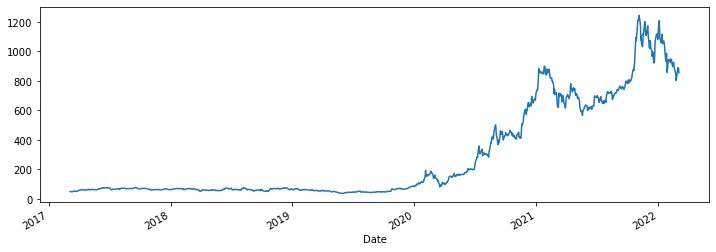

In [5]:
# plot the data 
df_tesla['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

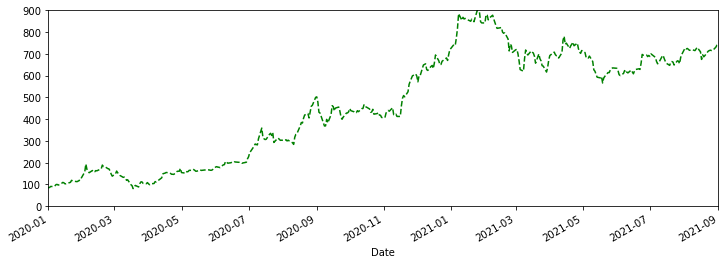

In [6]:
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],
                      ylim=(0, 900),
                      ls='--',
                      c='green',
                      figsize=(12,4))

In [7]:
df_tesla.index

DatetimeIndex(['2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09',
               '2017-03-10', '2017-03-13', '2017-03-14', '2017-03-15',
               '2017-03-16', '2017-03-17',
               ...
               '2022-02-18', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-28', '2022-03-01', '2022-03-02',
               '2022-03-03', '2022-03-04'],
              dtype='datetime64[ns]', name='Date', length=1260, freq=None)

In [15]:
index = df_tesla.loc['2020-01-01':'2021-01-01'].index
share_open = df_tesla.loc['2020-01-01':'2021-01-01']['Open']

In [16]:
share_open

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2020-12-24    642.989990
2020-12-28    674.510010
2020-12-29    661.000000
2020-12-30    672.000000
2020-12-31    699.989990
Name: Open, Length: 253, dtype: float64

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

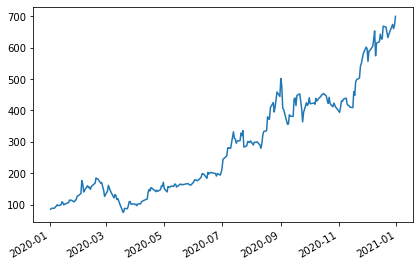

In [21]:
figure, axis = plt.subplots()
plt.tight_layout()
# preventing overlapping
figure.autofmt_xdate()
axis.plot(index, share_open)

#### Datetime index

In [25]:
df_tesla  = df_tesla.reset_index()

In [28]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1260 non-null   datetime64[ns]
 1   High       1260 non-null   float64       
 2   Low        1260 non-null   float64       
 3   Open       1260 non-null   float64       
 4   Close      1260 non-null   float64       
 5   Volume     1260 non-null   float64       
 6   Adj Close  1260 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [29]:
df_tesla = df_tesla.set_index('Date')